In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer




from sklearn.metrics import mean_squared_error, r2_score

import re, string, unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor





In [ ]:
df_bw = pd.read_csv('/content/drive/MyDrive/Mirav/Bowling Data.csv')

In [ ]:
df_bw.head()

id              Name  Matches  Overs Bowled  Bowls  Runs Given  \
0   1  Geralda Lacroutz        6             6     36          50   
1   2  Beverley Cicculi        5             5     30          90   
2   3    Rachele Annice        7             7     42          47   
3   4      Merilyn Blue        7             7     42          31   
4   5      Louise Luxon        5             5     30          64   

   Wickets Taken  Economy  Average  Performance Wickets 5  \
0              6     8.23        8                      4   
1              4     4.99       22                      1   
2              1     4.75       47                      1   
3              7     7.77        4                      1   
4              9     5.97        7                      2   

   Performance Wickets 4  Performance Wickets 3  Performance Wickets 2  \
0                      2                      4                      1   
1                      3                      3                      3   
2                      1                      3                      1   
3                      3                      2                      1   
4                      4                      1                      1   

   Performance Wickets 1  
0                      4  
1                      5  
2                      3  
3                      6  
4                      2

In [ ]:
df_bw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     600 non-null    int64  
 1   Name                   600 non-null    object 
 2   Matches                600 non-null    int64  
 3   Overs Bowled           600 non-null    int64  
 4   Bowls                  600 non-null    int64  
 5   Runs Given             600 non-null    int64  
 6   Wickets Taken          600 non-null    int64  
 7   Economy                600 non-null    float64
 8   Average                600 non-null    int64  
 9   Performance Wickets 5  600 non-null    int64  
 10  Performance Wickets 4  600 non-null    int64  
 11  Performance Wickets 3  600 non-null    int64  
 12  Performance Wickets 2  600 non-null    int64  
 13  Performance Wickets 1  600 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 65.8+ KB

In [ ]:
df_bw.describe()

id     Matches  Overs Bowled       Bowls  Runs Given  \
count  600.000000  600.000000    600.000000  600.000000  600.000000   
mean   300.500000    6.473333      6.473333   38.840000   60.531667   
std    173.349358    1.120140      1.120140    6.720839   17.437961   
min      1.000000    5.000000      5.000000   30.000000   30.000000   
25%    150.750000    5.000000      5.000000   30.000000   45.000000   
50%    300.500000    7.000000      7.000000   42.000000   61.000000   
75%    450.250000    7.000000      7.000000   42.000000   75.000000   
max    600.000000    8.000000      8.000000   48.000000   90.000000   

       Wickets Taken     Economy     Average  Performance Wickets 5  \
count     600.000000  600.000000  600.000000             600.000000   
mean        6.593333    6.512350   14.576667               2.516667   
std         3.471028    1.419011   15.162694               1.123310   
min         1.000000    4.000000    2.000000               1.000000   
25%         3.000000    5.295000    5.000000               1.000000   
50%         7.000000    6.495000    9.000000               3.000000   
75%        10.000000    7.812500   18.000000               3.000000   
max        12.000000    9.000000   90.000000               4.000000   

       Performance Wickets 4  Performance Wickets 3  Performance Wickets 2  \
count             600.000000             600.000000             600.000000   
mean                2.500000               2.518333               2.478333   
std                 1.115979               1.115828               1.148214   
min                 1.000000               1.000000               1.000000   
25%                 2.000000               2.000000               1.000000   
50%                 2.000000               3.000000               2.000000   
75%                 4.000000               4.000000               4.000000   
max                 4.000000               4.000000               4.000000   

       Performance Wickets 1  
count             600.000000  
mean                3.515000  
std                 1.703314  
min                 1.000000  
25%                 2.000000  
50%                 4.000000  
75%                 5.000000  
max                 6.000000

In [ ]:
# Check for missing values
print(df_bw.isnull().sum())

id                       0
Name                     0
Matches                  0
Overs Bowled             0
Bowls                    0
Runs Given               0
Wickets Taken            0
Economy                  0
Average                  0
Performance Wickets 5    0
Performance Wickets 4    0
Performance Wickets 3    0
Performance Wickets 2    0
Performance Wickets 1    0
dtype: int64


# EDA

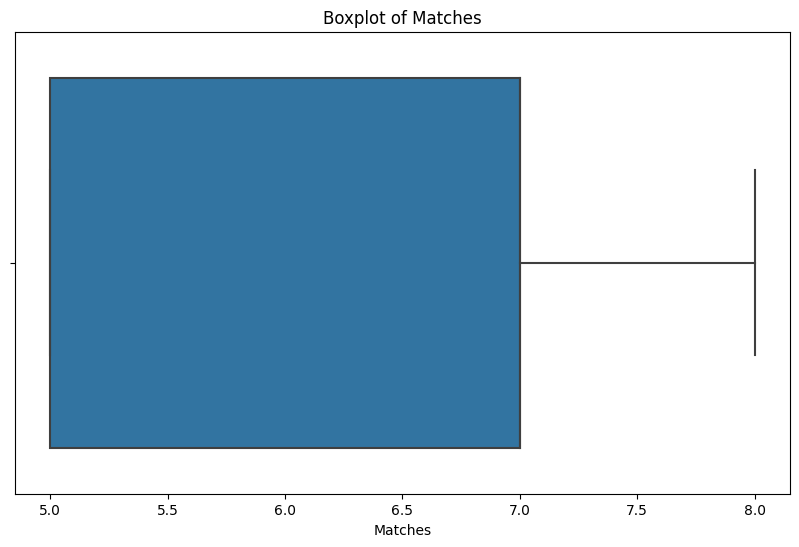

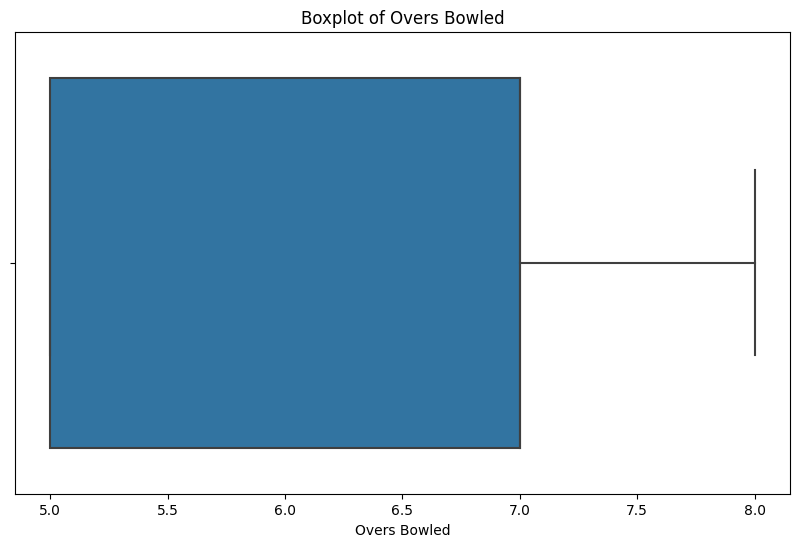

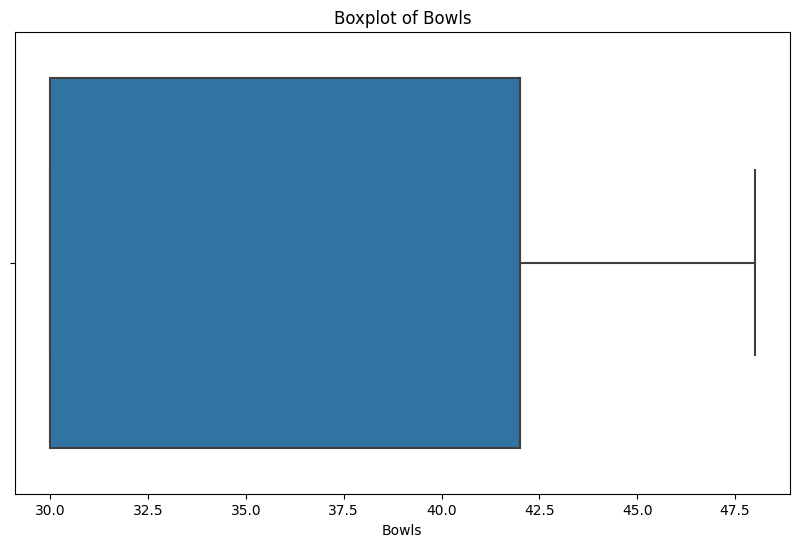

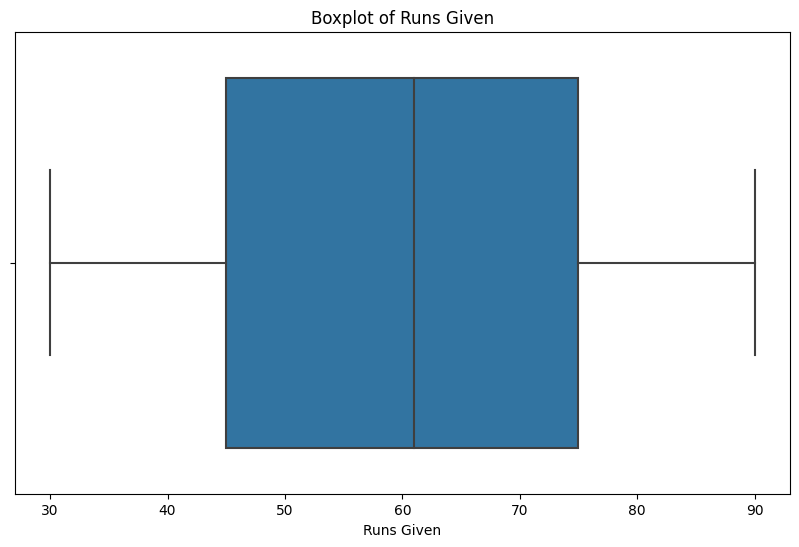

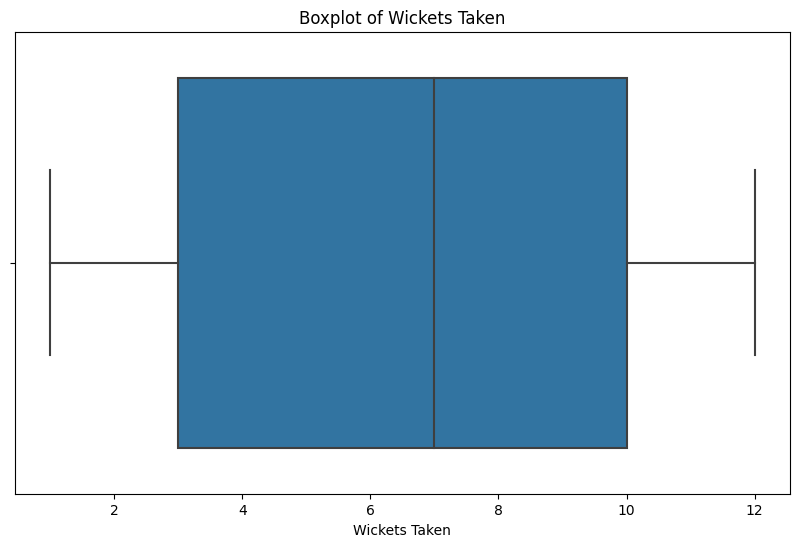

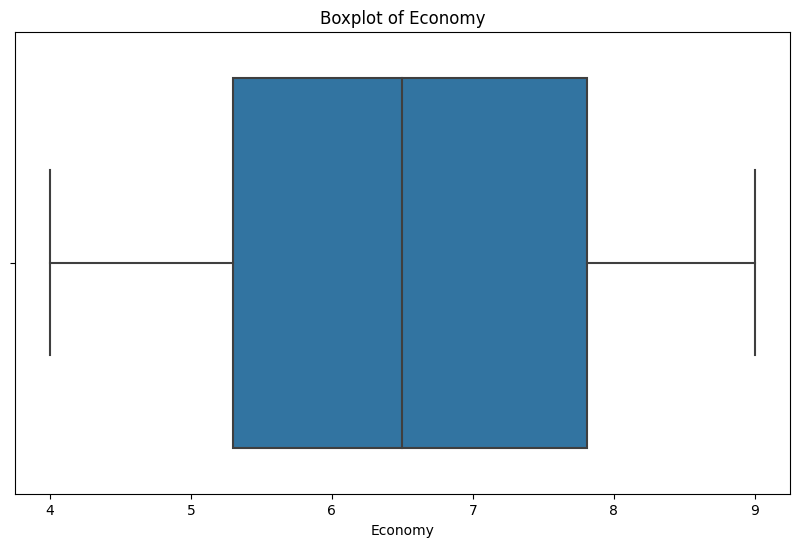

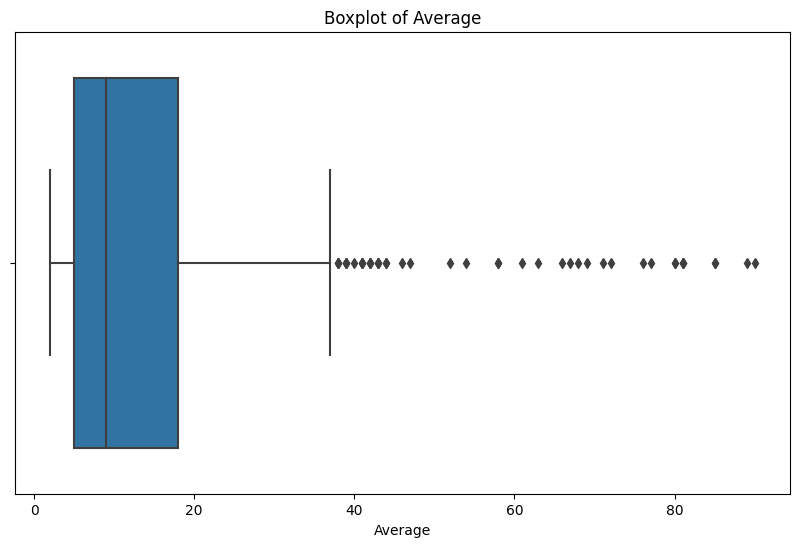

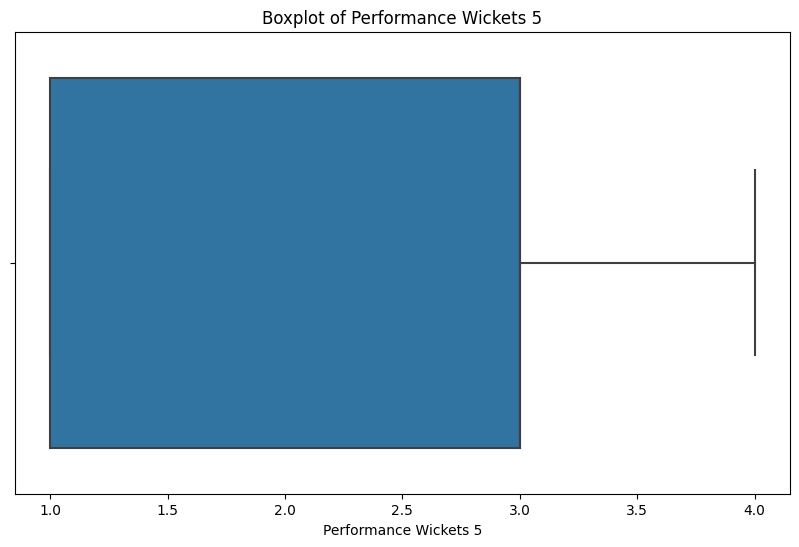

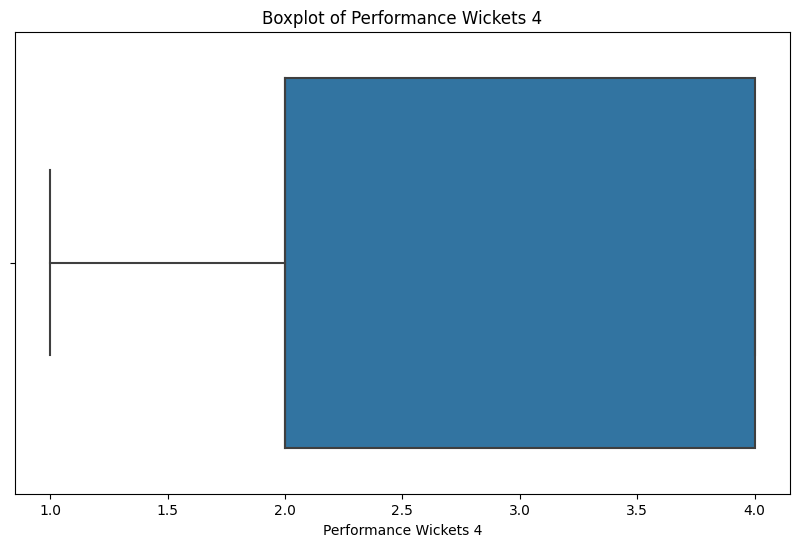

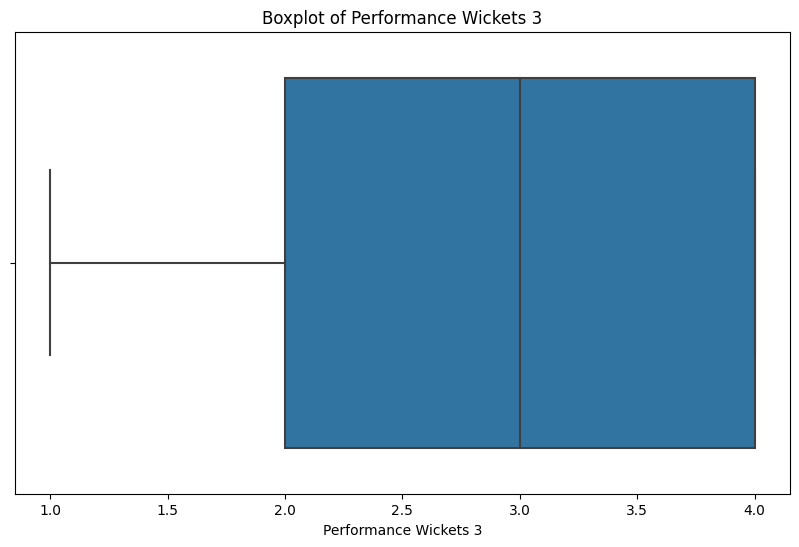

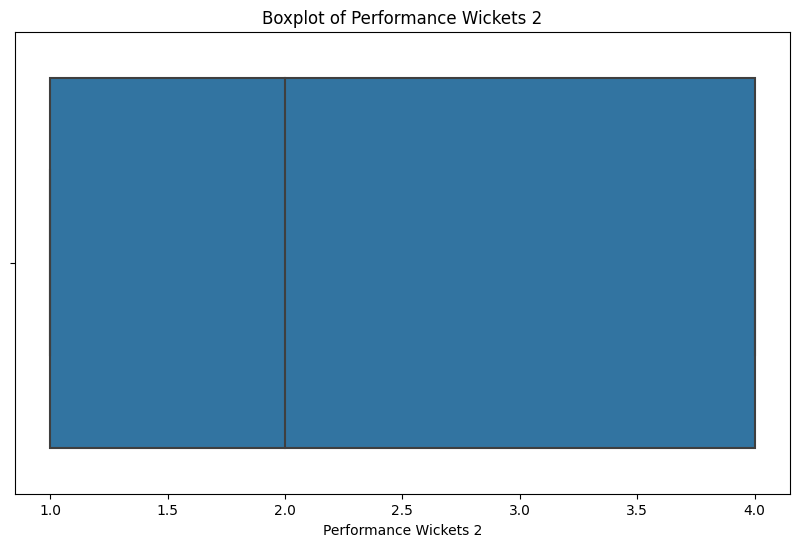

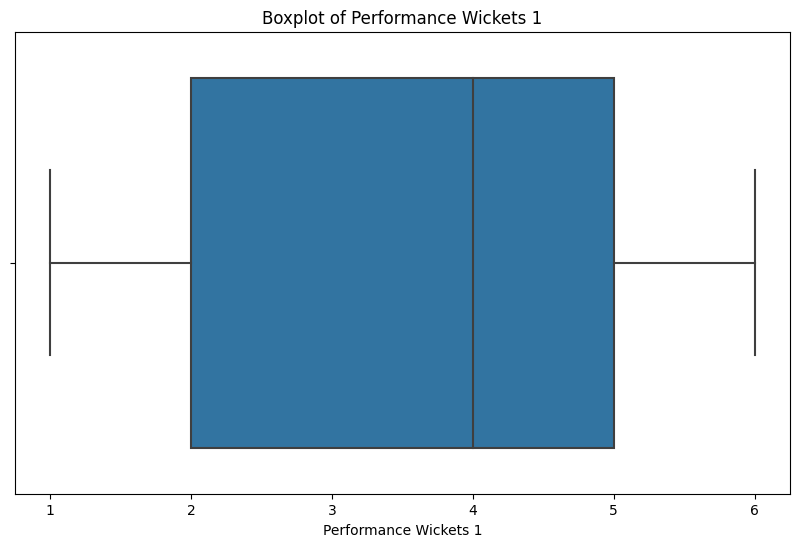

In [ ]:
# Distributions of numerical columns
numeric_columns_bw = ['Matches', 'Overs Bowled', 'Bowls', 'Runs Given', 'Wickets Taken', 'Economy', 'Average', 'Performance Wickets 5', 'Performance Wickets 4', 'Performance Wickets 3', 'Performance Wickets 2', 'Performance Wickets 1']

# Box plots for numerical data
for column in numeric_columns_bw:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_bw[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

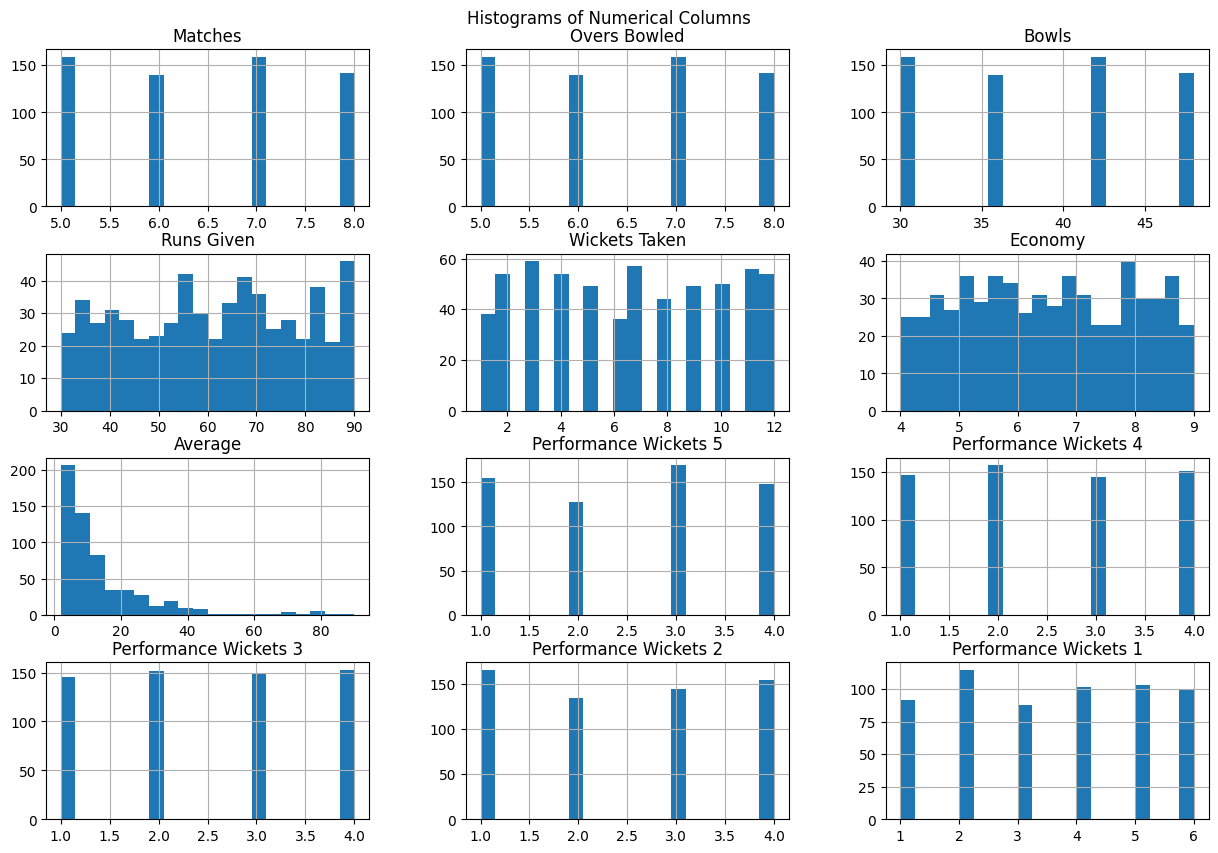

In [ ]:
# Histograms for numerical data
df_bw[numeric_columns_bw].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Columns', x=0.5, y=0.92, ha='center', fontsize='large')
plt.show()

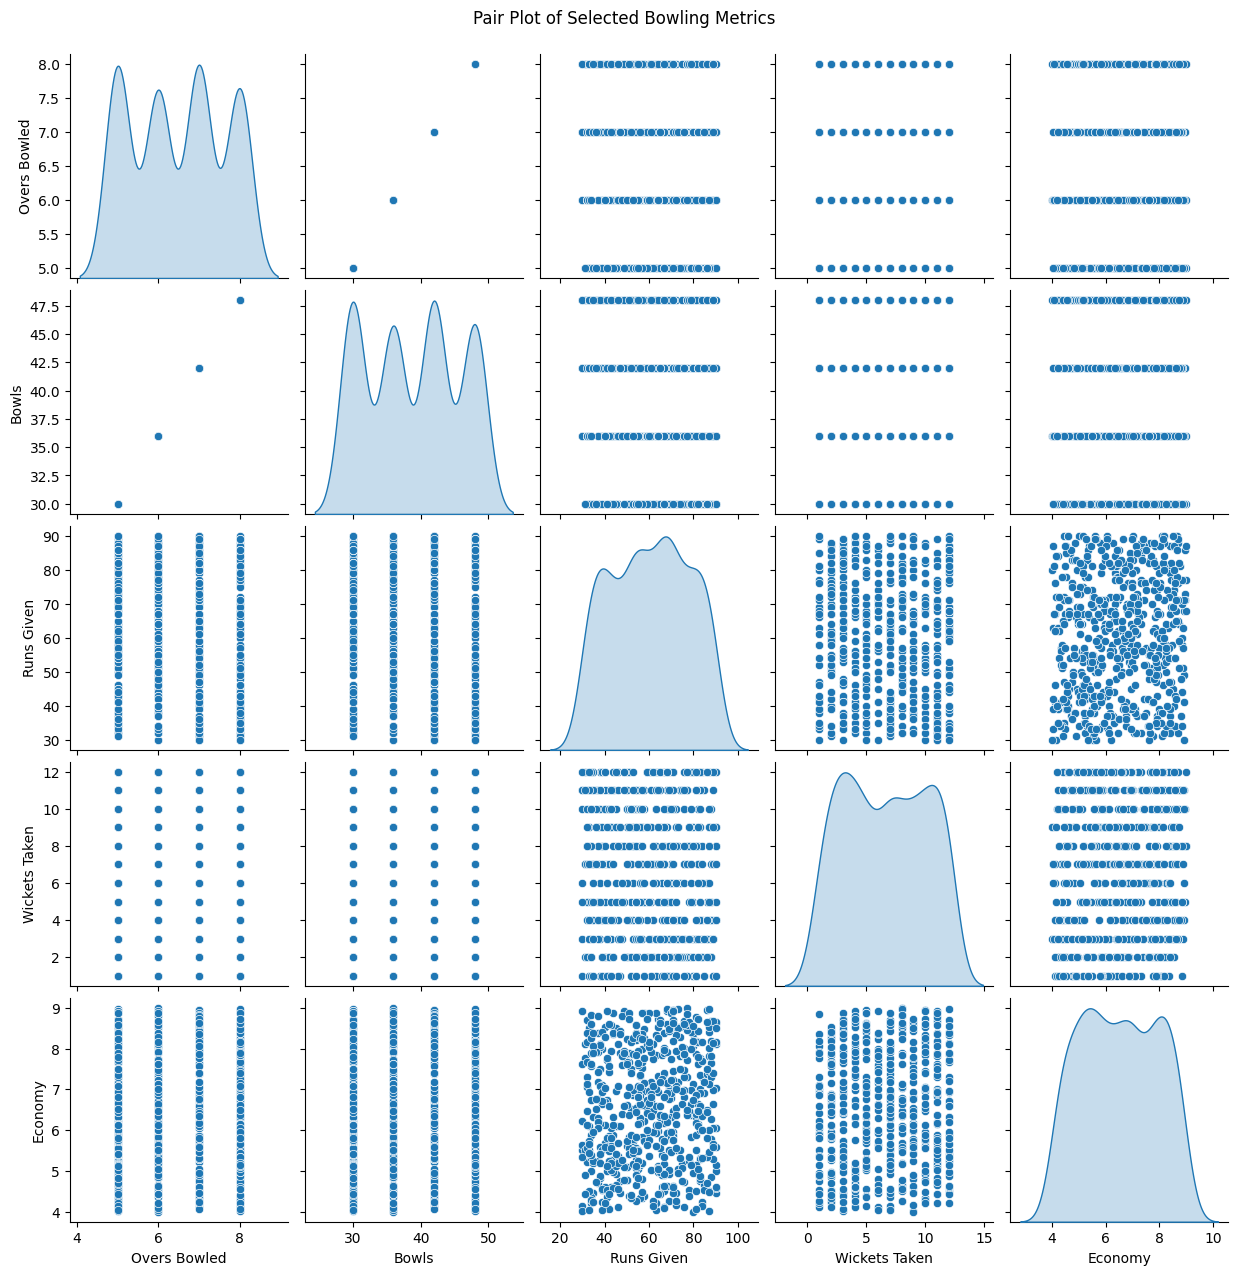

In [ ]:
# Pair plot for selected columns- Displaying pairwise relationships and distributions for selected numerical columns.
pair_plot_columns = ['Overs Bowled', 'Bowls', 'Runs Given', 'Wickets Taken', 'Economy']
sns.pairplot(df_bw[pair_plot_columns], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Bowling Metrics', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

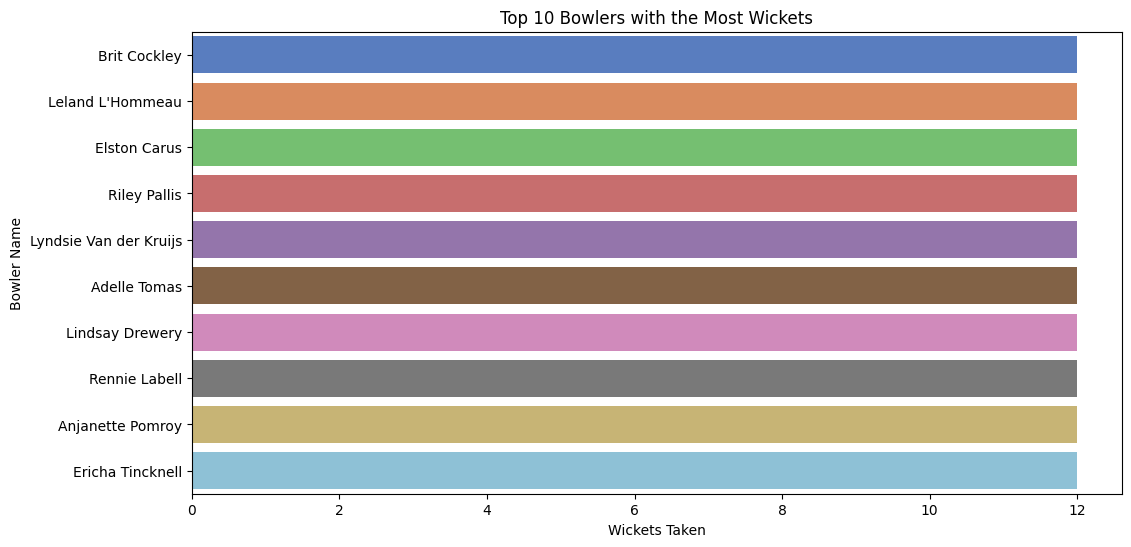

In [ ]:
# Adding a column for bowler efficiency (Wickets Taken / Runs Given)
df_bw['Efficiency'] = np.where(df_bw['Runs Given'] == 0, df_bw['Wickets Taken'], df_bw['Wickets Taken'] / df_bw['Runs Given'])

# Bar plot for top 10 bowlers with the most wickets
top_10_wickets = df_bw.nlargest(10, 'Wickets Taken')[['Name', 'Wickets Taken']]
plt.figure(figsize=(12, 6))
sns.barplot(x='Wickets Taken', y='Name', data=top_10_wickets, palette='muted')
plt.title('Top 10 Bowlers with the Most Wickets')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler Name')
plt.show()

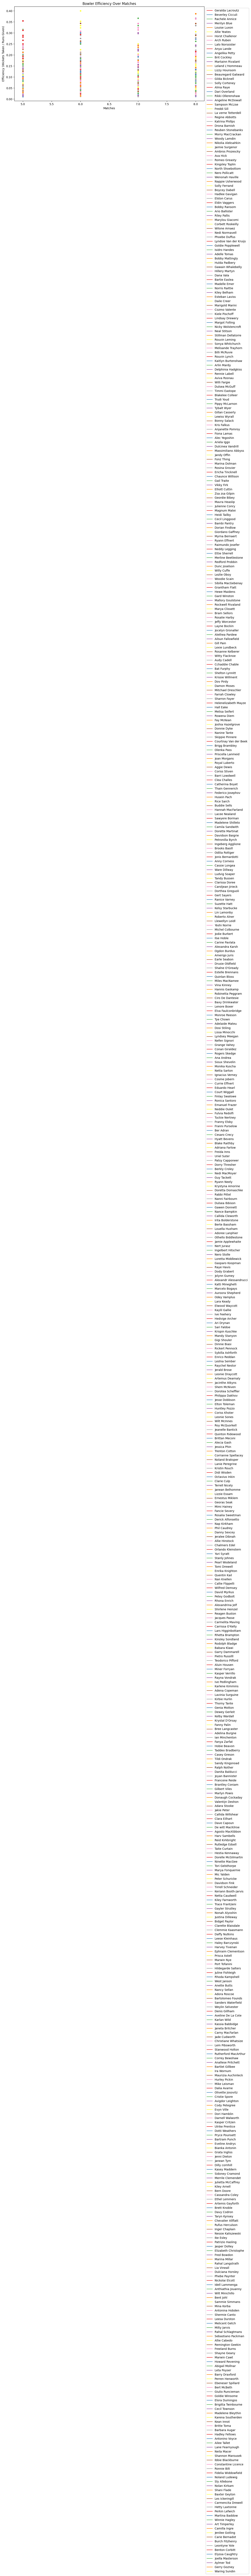

In [ ]:
# Line chart for bowler efficiency over matches
plt.figure(figsize=(12, 6))
sns.lineplot(x='Matches', y='Efficiency', hue='Name', data=df_bw, palette='Set1', marker='o')
plt.title('Bowler Efficiency Over Matches')
plt.xlabel('Matches')
plt.ylabel('Efficiency (Wickets Taken / Runs Given)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


<Figure size 1200x800 with 0 Axes>

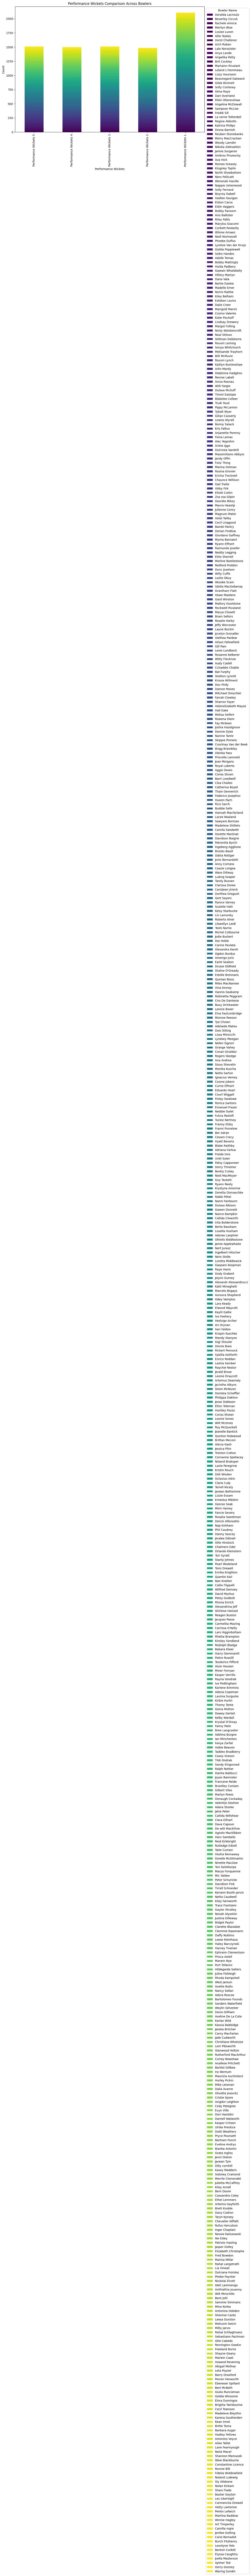

In [ ]:
# Stacked bar chart for comparing Performance Wickets across bowlers
performance_columns = ['Performance Wickets 5', 'Performance Wickets 4', 'Performance Wickets 3', 'Performance Wickets 2', 'Performance Wickets 1']
df_bw_performance = df_bw[['Name'] + performance_columns]

plt.figure(figsize=(12, 8))
df_bw_performance.set_index('Name').T.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Performance Wickets Comparison Across Bowlers')
plt.xlabel('Performance Wickets')
plt.ylabel('Count')
plt.legend(title='Bowler Name', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

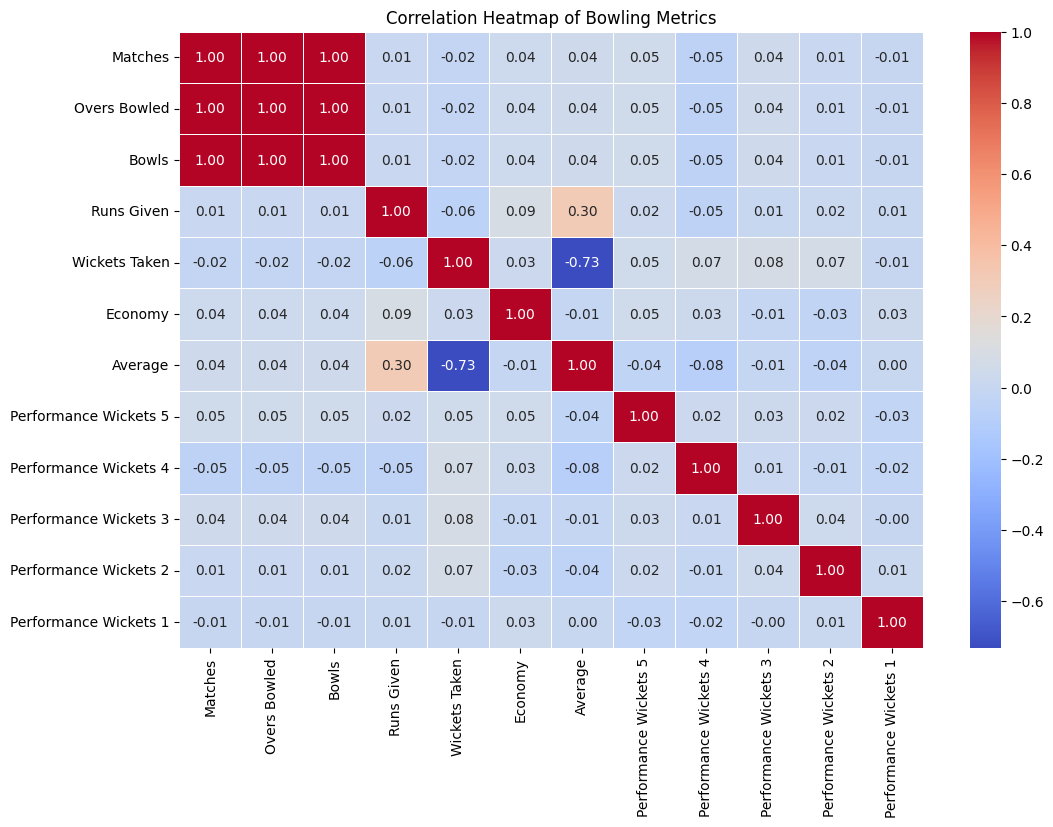

In [ ]:
# Correlation heatmap
correlation_matrix = df_bw[numeric_columns_bw].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Bowling Metrics')
plt.show()

# Feature Engineering

In [ ]:
# Check for duplicate rows
duplicates_bw = df_bw[df_bw.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicates_bw)

# Remove duplicate rows (if any)
df_bw = df_bw.drop_duplicates()

# Verify that duplicates are removed
duplicates_after_removal = df_bw[df_bw.duplicated()]
print("\nDuplicate Rows after Removal:")
print(duplicates_after_removal)


Duplicate Rows:
Empty DataFrame
Columns: [id, Name, Matches, Overs Bowled, Bowls, Runs Given, Wickets Taken, Economy, Average, Performance Wickets 5, Performance Wickets 4, Performance Wickets 3, Performance Wickets 2, Performance Wickets 1, Efficiency]
Index: []

Duplicate Rows after Removal:
Empty DataFrame
Columns: [id, Name, Matches, Overs Bowled, Bowls, Runs Given, Wickets Taken, Economy, Average, Performance Wickets 5, Performance Wickets 4, Performance Wickets 3, Performance Wickets 2, Performance Wickets 1, Efficiency]
Index: []


No duplicates

In [ ]:
# Drop the 'id' column
df_bw = df_bw.drop(columns=['id'])
df_bw = df_bw.drop(columns=['Efficiency'])
# Display the updated DataFrame
df_bw.head()

Name  Matches  Overs Bowled  Bowls  Runs Given  Wickets Taken  \
0  Geralda Lacroutz        6             6     36          50              6   
1  Beverley Cicculi        5             5     30          90              4   
2    Rachele Annice        7             7     42          47              1   
3      Merilyn Blue        7             7     42          31              7   
4      Louise Luxon        5             5     30          64              9   

   Economy  Average  Performance Wickets 5  Performance Wickets 4  \
0     8.23        8                      4                      2   
1     4.99       22                      1                      3   
2     4.75       47                      1                      1   
3     7.77        4                      1                      3   
4     5.97        7                      2                      4   

   Performance Wickets 3  Performance Wickets 2  Performance Wickets 1  
0                      4                      1                      4  
1                      3                      3                      5  
2                      3                      1                      3  
3                      2                      1                      6  
4                      1                      1                      2

# Model Building

#### Linear Regression

In [ ]:
# Assuming df_bw is the DataFrame with the provided columns

# Set up the target variable
target_variable = 'Average'
y = df_bw[target_variable]

# Feature Selection
features = ['Matches', 'Overs Bowled', 'Bowls', 'Runs Given', 'Wickets Taken',
            'Performance Wickets 5', 'Performance Wickets 4', 'Performance Wickets 3',
            'Performance Wickets 2', 'Performance Wickets 1']

# Select features
X = df_bw[features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model (or other models as needed)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 68.8990198730613
R-squared: 0.6544768492880091


The results show that the linear regression model for predicting "Average" has a Mean Squared Error (MSE) of 68.90 and an R-squared value of 0.65. Here's a brief interpretation:

Mean Squared Error (MSE): The MSE measures the average squared difference between the actual and predicted values. In this case, the MSE of 68.90 suggests that, on average, the predicted values are approximately 68.90 units away from the actual values.
R-squared (R²): The R-squared value indicates the proportion of the variance in the target variable that is explained by the model. A value of 0.65 suggests that the model explains about 65% of the variability in the "Average" values.

###  Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Initialize the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree
dt_predictions = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("Decision Tree Model:")
print(f'Mean Squared Error: {dt_mse}')
print(f'R-squared: {dt_r2}')




Decision Tree Model:
Mean Squared Error: 1.6833333333333333
R-squared: 0.9915582160950411


### Random Forest

In [ ]:
# Set up the target variable
target_variable = 'Average'
y = df_bw[target_variable]

# Feature Selection
features = ['Matches', 'Overs Bowled', 'Bowls', 'Runs Given', 'Wickets Taken',
            'Performance Wickets 5', 'Performance Wickets 4', 'Performance Wickets 3',
            'Performance Wickets 2', 'Performance Wickets 1']

# Select features
X = df_bw[features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set using Random Forest
rf_predictions = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Model:")
print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')

Random Forest Model:
Mean Squared Error: 0.22649166666666667
R-squared: 0.9988641621546888


The Random Forest model has produced promising results:

Mean Squared Error (MSE): The MSE of 0.23 is significantly lower than the MSE of the linear regression model, indicating that the Random Forest model is providing more accurate predictions.

R-squared (R²): The R-squared value of 0.999 indicates that the Random Forest model explains approximately 99.9% of the variability in the "Average" values. This suggests a very strong fit to the data.

These results suggest that the
Random Forest model is performing exceptionally well in predicting the "Average" values based on the selected features. Random Forests are known for their ability to capture complex relationships and handle non-linearities in the data.

The Decision Tree model results are also quite promising:

Mean Squared Error (MSE): The MSE of 1.68 is relatively low, indicating that the Decision Tree model is providing accurate predictions.
R-squared (R²): The R-squared value of 0.992 suggests that the Decision Tree model explains approximately 99.2% of the variability in the "Average" values. This is indicative of a strong fit to the data.
Comparing these results with the Random Forest model:

The Decision Tree model has a higher MSE and a slightly lower R-squared value compared to the Random Forest.
Random Forests generally outperform individual Decision Trees because they reduce overfitting and enhance generalization.

### Hyperpermiter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(random_forest_model, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_params = rf_grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best Random Forest model
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluate the best Random Forest model
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)

print("Best Random Forest Model:")
print(f'Best Hyperparameters: {best_rf_params}')
print(f'Mean Squared Error: {best_rf_mse}')
print(f'R-squared: {best_rf_r2}')


Best Random Forest Model:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 0.22649166666666667
R-squared: 0.9988641621546888


In [ ]:
# Define the parameter grid
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
dt_grid_search = GridSearchCV(decision_tree_model, param_grid=dt_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model with hyperparameter tuning
dt_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_dt_params = dt_grid_search.best_params_

# Train the model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_dt_params, random_state=42)
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set using the best Decision Tree model
best_dt_predictions = best_dt_model.predict(X_test)

# Evaluate the best Decision Tree model
best_dt_mse = mean_squared_error(y_test, best_dt_predictions)
best_dt_r2 = r2_score(y_test, best_dt_predictions)

print("Best Decision Tree Model:")
print(f'Best Hyperparameters: {best_dt_params}')
print(f'Mean Squared Error: {best_dt_mse}')
print(f'R-squared: {best_dt_r2}')


Best Decision Tree Model:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Squared Error: 0.8418981481481481
R-squared: 0.9957779471861475


Random Forest
Best Hyperparameters:
* {'max_depth': None,
* 'min_samples_leaf': 1,
* 'min_samples_split': 2,  
* 'n_estimators': 100}

Mean Squared Error (MSE): 0.23
R-squared (R²): 0.999


Decision Tree Model:
Best Hyperparameters:
* {'max_depth': None,  
* 'min_samples_leaf': 2,
* 'min_samples_split': 2}

Mean Squared Error (MSE): 0.84
R-squared (R²): 0.996


It's notable that the Random Forest model continues to outperform the Decision Tree model even after hyperparameter tuning, as evidenced by the lower MSE and higher R-squared values.

### Predicting and picking the best 5 players

In [ ]:
# Assuming df_bw is your DataFrame with the provided columns

# Add a new column for "Performance Wickets 6" (initialize with NaN values)
df_bw['Performance Wickets 6'] = np.nan

# Set up the target variable for "Average"
target_variable_average = 'Average'
y_average_bw = df_bw[target_variable_average]

# Feature Selection
features_bw = ['Matches', 'Overs Bowled', 'Bowls', 'Runs Given', 'Wickets Taken','Economy',
               'Performance Wickets 5', 'Performance Wickets 4', 'Performance Wickets 3',
               'Performance Wickets 2', 'Performance Wickets 1']

# Select features
X_bw = df_bw[features_bw]

# Split the data into training and testing sets
X_train_bw, X_test_bw, y_train_average_bw, y_test_average_bw = train_test_split(X_bw, y_average_bw, test_size=0.2, random_state=42)

# Initialize the Random Forest model with the best hyperparameters
best_rf_model_bw = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)

# Train the Random Forest model for "Average"
best_rf_model_bw.fit(X_train_bw, y_train_average_bw)

# Make predictions for "Average" on the test set
predictions_average_bw = best_rf_model_bw.predict(X_test_bw)

# Update the "Performance Wickets 6" column with predicted values
df_bw.loc[X_test_bw.index, 'Performance Wickets 6'] = predictions_average_bw

# Calculate the average performance
average_performance_bw = df_bw['Performance Wickets 6'].mean()

# Compare predicted "Performance Wickets 6" with "Average"
df_bw['Performance Wickets 6 vs Average'] = df_bw['Performance Wickets 6'] - average_performance_bw

# Select the top 5 players based on the predicted "Performance Wickets 6"
top_players_comparison_bw = df_bw.nlargest(5, 'Performance Wickets 6')[['Name', 'Performance Wickets 6 vs Average', 'Performance Wickets 6']]

# Display the top 5 players and their relevant metrics
print("Top 5 Players:")
print(top_players_comparison_bw)


Top 5 Players:
                Name  Performance Wickets 6 vs Average  Performance Wickets 6
316    Leshia Sember                         66.480417                  80.28
570  Lane Fearnyough                         52.940417                  66.74
399    Kelby Wardall                         48.810417                  62.61
2     Rachele Annice                         32.360417                  46.16
155  Shelton Lynnitt                         29.130417                  42.93


In [ ]:
# import pickle

# # Save the best Random Forest model for bowling as a pickle file
# bowling_model_path = '/content/drive/MyDrive/Mirav/bowling_model.pkl' 


In [ ]:
import pickle
import pandas as pd

# Replace with the actual path where the bowling model is saved
bowling_model_path = '/content/drive/MyDrive/Mirav/bowling_model.pkl'

# Load the saved bowling model
with open(bowling_model_path, 'rb') as model_file:
    loaded_bowling_model = pickle.load(model_file)

# Assuming df_bw is the DataFrame with the provided columns
# Feature Selection
features_bw = ['Matches', 'Overs Bowled', 'Bowls', 'Runs Given', 'Wickets Taken','Economy',
               'Performance Wickets 5', 'Performance Wickets 4', 'Performance Wickets 3',
               'Performance Wickets 2', 'Performance Wickets 1']

# Select features for prediction
X_predict_bw = df_bw[features_bw]

# Make predictions for "Average"
predictions_average_bw = loaded_bowling_model.predict(X_predict_bw)

# Add the predicted values to the DataFrame
df_bw['Performance Wickets 6'] = predictions_average_bw

# Calculate the average performance
average_performance_bw = df_bw['Performance Wickets 6'].mean()

# Compare predicted "Performance Wickets 6" with "Average"
df_bw['Performance Wickets 6 vs Average'] = df_bw['Performance Wickets 6'] - average_performance_bw

# Select the top 5 players based on the comparison
top_players_comparison_bw = df_bw.nlargest(5, 'Performance Wickets 6')[['Name', 'Performance Wickets 6 vs Average', 'Performance Wickets 6']]

# Display the top 5 players and their relevant metrics
print("Top 5 Players:")
print(top_players_comparison_bw)


Top 5 Players:
               Name  Performance Wickets 6 vs Average  Performance Wickets 6
326   Elton Toleman                           74.1674                  88.71
180    Clea Challes                           72.8174                  87.36
334  Brittan Meconi                           70.5574                  85.10
285  Louella Huxham                           69.5274                  84.07
121  Dorian Findlow                           66.0774                  80.62


#### Testing with CSV Upload

In [ ]:

bowling_model_path = '/content/drive/MyDrive/Mirav/bowling_model.pkl'

# Load the saved bowling model
with open(bowling_model_path, 'rb') as model_file:
    loaded_bowling_model = pickle.load(model_file)

# Assuming 'file' is the uploaded CSV file
# Read the CSV file
file_path = '/content/drive/MyDrive/Mirav/Bowling Data.csv' 
data = pd.read_csv(file_path)

# Feature Selection
features_bw = ['Matches', 'Overs Bowled', 'Bowls', 'Runs Given', 'Wickets Taken', 'Economy',
               'Performance Wickets 5', 'Performance Wickets 4', 'Performance Wickets 3',
               'Performance Wickets 2', 'Performance Wickets 1']

# Select features for prediction
X_predict_bw = data[features_bw]

# Make predictions for "Average"
predictions_average_bw = loaded_bowling_model.predict(X_predict_bw)

# Add the predicted values to the DataFrame
data['Performance Wickets 6'] = predictions_average_bw

# Calculate the average performance
average_performance_bw = data['Performance Wickets 6'].mean()

# Compare predicted "Performance Wickets 6" with "Average"
data['Performance Wickets 6 vs Average'] = data['Performance Wickets 6'] - average_performance_bw

# Select the top 5 players based on the comparison
top_players_comparison_bw = data.nlargest(5, 'Performance Wickets 6')[['Name', 'Performance Wickets 6 vs Average', 'Performance Wickets 6']]

# Display the top 5 players and their relevant metrics
print("Top 5 Players:")
print(top_players_comparison_bw)


Top 5 Players:
               Name  Performance Wickets 6 vs Average  Performance Wickets 6
326   Elton Toleman                           74.1674                  88.71
180    Clea Challes                           72.8174                  87.36
334  Brittan Meconi                           70.5574                  85.10
285  Louella Huxham                           69.5274                  84.07
121  Dorian Findlow                           66.0774                  80.62
